# Optimizing the network

In [1]:
import sys
sys.path.append('/Users/zofia/packages/DataDrivenSampler-0.3/lib/python3.6/site-packages')

In [ ]:
# optimizing the network

In [13]:
from DataDrivenSampler.models.model import model
import numpy as np
FLAGS = model.setup_parameters(
            batch_data_files=["dataset-twoclusters.csv"],
            batch_size=500,
            max_steps=100,
            optimizer="GradientDescent",
            output_activation="linear",
            seed=426,
            step_width=1e-2
        )
nn = model(FLAGS)
nn.init_network(None, setup="train")
run_info, trajectory = nn.train(return_run_info=True, return_trajectories=True)
nn.finish()

print("Train results")
print(np.asarray(run_info[0:10]))
print(np.asarray(trajectory[0:10]))


Parsing ['dataset-twoclusters.csv']
(TensorShape([Dimension(None), Dimension(2)]), TensorShape([Dimension(None), Dimension(1)]))
(tf.float32, tf.int32)
Picking as input columns: ['x1', 'x2']
x is (?, 2)
Creating nn layer output with 2, 1
Setting up output files for train
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_1:0", shape=(1,), dtype=float64)
Starting to train
TRAINED down to loss 0.0293163 and accuracy 1.0.
Train results
[[1.0 0.0 '0.000' '4.16186523e+00' '3.90930000e-02' '1.18541766e-01'
  '2.12819406e+00' '2.12819406e+00']
 [2.0 1.0 '0.000' '2.87631893e+00' '1.32330000e-02' '9.83518833e-02'
  '1.18437418e+00' '1.65628412e+00']
 [3.0 2.0 '0.000' '1.99138141e+00' '6.50700000e-03' '8.16017447e-02'
  '5.82955768e-01' '1.29850800e+00']
 [4.0 3.0 '0.000' '1.38219643e+00' '6.

In [15]:
import pandas as pd 
df = pd.DataFrame(trajectory)
df.to_csv("run_optimizing.csv")

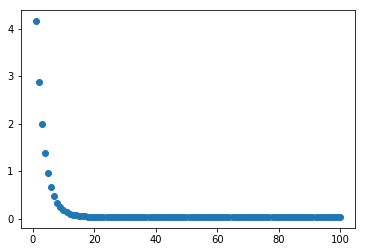

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_run = pd.read_csv("run_optimizing.csv", sep=',', header=0)
run=np.asarray(df_run.loc[:,['step','loss','kinetic_energy', 'total_energy']])
plt.scatter(run[:,0], run[:,1])
#plt.savefig('loss-step.png', bbox_inches='tight')
plt.show()
